# Advanced NLP with spaCy (Python)

In [1]:
data_folder = "C:/Users/Admin/Dropbox/Python/ficheiros/DataCamp/DataCamp - Advanced NLP with spaCy/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# CHAPTER 1 - Finding words, phrases, names and concepts
from spacy.lang.en import English
from spacy.lang.de import German
from spacy.lang.es import Spanish
import spacy
from spacy import displacy
from spacy.matcher import Matcher

# CHAPTER 2 - Large-scale data analysis with spaCy
from spacy.tokens import Doc, Span
import en_core_web_md
from spacy.matcher import PhraseMatcher

# Chapter 3 - Processing Pipelines
from spacy.tokens import Token

# Chapter 4 - Training a neural network model
import random


In [4]:
# plot 1 image
def plot_1(image1, left=0, bottom=0, right=1, top=1, wspace=0, hspace=0, format_img=".jpg"):
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 2 images horizontally
def plot_2(image1, image2, left=0, bottom=0, right=2.2, top=1, wspace=0, hspace=0.05, format_img=".jpg"):
    plt.subplot(1, 2, 1)
    image = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    image = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(image)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

# plot 3 images horizontally
def plot_3(image1, image2, image3, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 3, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 3, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()
    
# plot 4 images horizontally
def plot_4(image1, image2, image3, image4, left=0, bottom=-1, right=2.7, top=1, wspace=0, hspace=0.1, format_img=".jpg"):
    plt.subplot(1, 4, 1)
    imagem = plt.imread(data_folder + (image1+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 2)
    imagem = plt.imread(data_folder + (image2+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 3)
    imagem = plt.imread(data_folder + (image3+format_img))
    plt.axis('off')
    plt.imshow(imagem)
    plt.subplot(1, 4, 4)
    imagem = plt.imread(data_folder + (image4+format_img))
    plt.axis('off')
    plt.imshow(imagem)    
    plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)
    plt.show()

##    CHAPTER 1  - Finding words, phrases, names and concepts

This chapter will introduce you to the basics of text processing with spaCy. You'll learn about the data structures, how to work with statistical models, and how to use them to predict linguistic features in your text.

#### Exercício 1 - Introduction to spaCy

The nlp object:
- contains the processing pipeline.
- includes language-specic rules for tokenization, etc.

The Doc object:
Hello
world
!


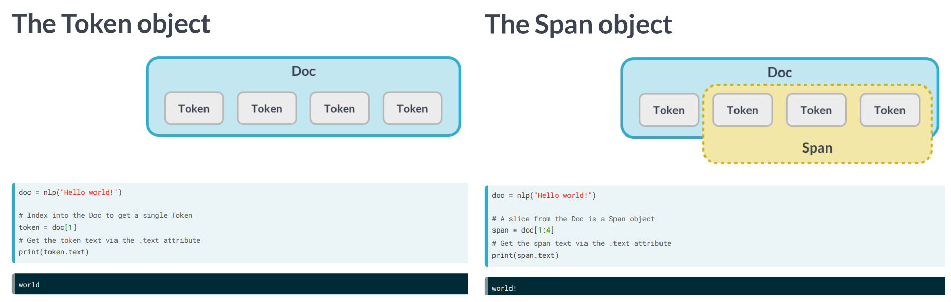

Lexical attributes:
Index:  [0, 1, 2, 3, 4]
Text:  ['It', 'costs', '$', '5', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


In [5]:
#vídeo

# The nlp object
print("""The nlp object:
- contains the processing pipeline.
- includes language-specic rules for tokenization, etc.\n""")

# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# The Doc object.
print("The Doc object:")

# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

# The Token and Span objects
plot_2('token', 'span')

# A slice from the Doc is a Span object
span = doc[1:4]

##########################

# Lexical attributes
print("Lexical attributes:")
doc = nlp("It costs $5.")
print('Index: ', [token.i for token in doc])
print('Text: ', [token.text for token in doc])
print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])


Exercício 2

- Available languages: https://spacy.io/usage/models#languages
- spaCy Cheat Sheet: http://datacamp-community-prod.s3.amazonaws.com/29aa28bf-570a-4965-8f54-d6a541ae4e06

In [6]:
# Getting Started

# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

############################

# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

##############################

# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

This is a sentence.
Liebe Grüße!
¿Cómo estás?


Exercício 3

In [7]:
# Documents, spans and tokens

# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

############################################

# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:-1]
print(tree_kangaroos_and_narwhals.text)


I
tree kangaroos
tree kangaroos and narwhals


Exercício 4

In [8]:
# Lexical attributes

# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)


Percentage found: 60
Percentage found: 4


#### Exercício 5 - Statistical models

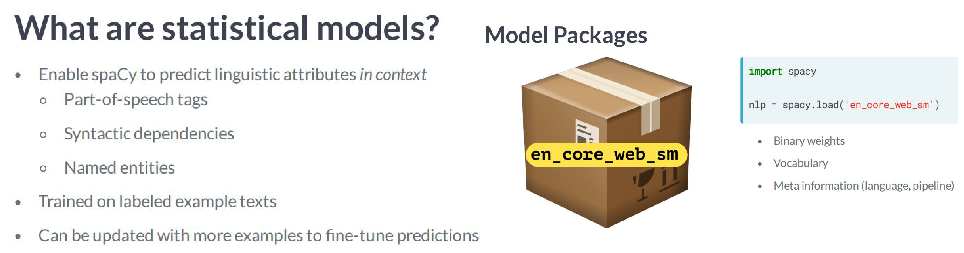


Predicting Part-of-speech Tags:
She PRON
ate VERB
the DET
pizza NOUN

Predicting Syntactic Dependencies:
She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


Predicting Named Entities:
Apple ORG
U.K. GPE
$1 billion MONEY

Get quick definitions of the most common tags and labels: .explain method
Countries, cities, states
noun, proper singular
direct object


In [9]:
#vídeo

plot_2('statistical_models', 'model_packages')

# Predicting Part-of-speech Tags
print("\nPredicting Part-of-speech Tags:")

import spacy
# Load the small English model
nlp = spacy.load('en_core_web_sm')
# Process a text
doc = nlp("She ate the pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)
    
#########################################

# Predicting Syntactic Dependencies
print("\nPredicting Syntactic Dependencies:")

for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

from spacy import displacy  # Visualize dependencies
displacy.render(doc, style="dep")

#########################################

# Predicting Named Entities
print("Predicting Named Entities:")

# Process a text
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

####################################################

# Get quick definitions of the most common tags and labels
print("\nGet quick definitions of the most common tags and labels: .explain method")

print(spacy.explain('GPE'))
print(spacy.explain('NNP'))
print(spacy.explain('dobj'))


Exercício 6

In [10]:
# Model packages
# What's not included in a model package that you can load into spaCy?
print("""1) A meta file including the language, pipeline and license: (True)
All models include a meta.json that defines the language to initialize, the pipeline component names to load as well as 
general meta information like the model name, version, license, data sources, author and accuracy figures (if available).

2) Binary weights to make statistical predictions: (True)
To predict linguistic annotations like part-of-speech tags, dependency labels or named entities, models include binary 
weights.

--> 3) The labelled data that the model was trained on: (False)
correct! Statistical models allow you to generalize based on a set of training examples. Once they're trained, they use 
binary weights to make predictions. That's why it's not necessary to ship them with their training data.

4) Strings of the model's vocabulary and their hashes: (True)
Model packages include a strings.json that stores the entries in the model's vocabulary and the mapping to hashes. This 
allows spaCy to only communicate in hashes and look up the corresponding string if needed. 
""")

1) A meta file including the language, pipeline and license: (True)
All models include a meta.json that defines the language to initialize, the pipeline component names to load as well as 
general meta information like the model name, version, license, data sources, author and accuracy figures (if available).

2) Binary weights to make statistical predictions: (True)
To predict linguistic annotations like part-of-speech tags, dependency labels or named entities, models include binary 
weights.

--> 3) The labelled data that the model was trained on: (False)
correct! Statistical models allow you to generalize based on a set of training examples. Once they're trained, they use 
binary weights to make predictions. That's why it's not necessary to ship them with their training data.

4) Strings of the model's vocabulary and their hashes: (True)
Model packages include a strings.json that stores the entries in the model's vocabulary and the mapping to hashes. This 
allows spaCy to only commu

Exercício 7

In [11]:
# Loading models

# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

########

# Load the 'de_core_news_sm' model – spaCy is already imported
nlp = spacy.load('de_core_news_sm')

text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value
Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht


Exercício 8

In [12]:
# Predicting linguistic annotations

nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))
    
print("\n")

# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print(ent.text, ent.label_)

# In the next exercise, you'll see what happens if the model is wrong, and how to adjust it.

It          PRON      nsubj     
’s          PROPN     ROOT      
official    NOUN      acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          VERB      ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


Exercício 9

In [13]:
# Predicting named entities in context

text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print(ent.text, ent.label_)

# the model didn't predict "iPhone X"
# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print('\nMissing entity:', iphone_x.text)

print("""\nOf course, you don't always have to do this manually. In the next video, you'll learn about spaCy's rule-based 
matcher, which can help you find certain words and phrases in text.""")

Apple ORG

Missing entity: iPhone X

Of course, you don't always have to do this manually. In the next video, you'll learn about spaCy's rule-based 
matcher, which can help you find certain words and phrases in text.


#### Exercício 10 - Rule-based matching

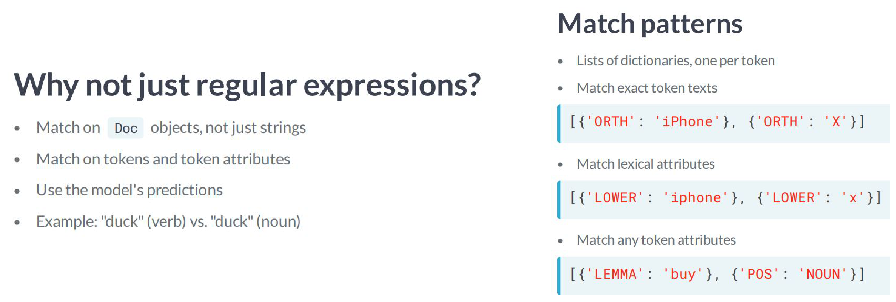

Using the Matcher (1):
nlp = spacy.load('en_core_web_sm'):  <spacy.lang.en.English object at 0x000001E683BE5AC8>
matcher = Matcher(nlp.vocab):  <spacy.matcher.matcher.Matcher object at 0x000001E680AB1ED0>
[(9528407286733565721, 1, 3)]
iPhone X

Matching lexical attributes:
2018 FIFA World Cup:

Matching other token attributes:
loved dogs
love cats

Using operators and quantiers (1):
bought a smartphone
buying apps


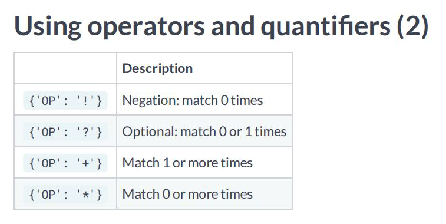

In [14]:
#vídeo
import spacy

plot_2('reg_exp', 'match_patt')

##################################################

# Using the Matcher (1)
print("Using the Matcher (1):")

# Import the Matcher
from spacy.matcher import Matcher

# Load a model (small in this case -> ver à frente medium e lg) and create the nlp object
nlp = spacy.load('en_core_web_sm')
print("nlp = spacy.load('en_core_web_sm'): ", nlp)   # <spacy.lang.en.English object at 0x000001F61D7C2828>

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)   # ---> depois vemos melhor o nlp.vocab, o que inclui lá dentro
print("matcher = Matcher(nlp.vocab): ", matcher)  #  <spacy.matcher.matcher.Matcher at 0x15f367f4de0>

#############

# Add the pattern to the matcher
pattern = [{'ORTH': 'iPhone'}, {'ORTH': 'X'}]

matcher.add('IPHONE_PATTERN', # unique id to identify which pattern was matched
            None,  # the second argument is an optional call-back (don't need one here, so set as None)
            pattern)  # the third is the pattern itself (see above)

# Process some text
doc = nlp("New iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

print(matches)
# --> match_id : hash value of the pattern name; start/end: start/end index of matched span

# Using the Matcher (1) - Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)
    
################################################################################

# Matching lexical attributes
print("\nMatching lexical attributes:")

pattern_2 = [{'IS_DIGIT': True}, {'LOWER': 'fifa'}, {'LOWER': 'world'}, {'LOWER': 'cup'}, {'IS_PUNCT': True}]

matcher.add('WORLD_CUP_PATTERN', None, pattern_2)

doc = nlp("2018 FIFA World Cup: France won!")

matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)
    
########################################################

# Matching other token attributes
print("\nMatching other token attributes:")

pattern_3 = [{'LEMMA': 'love', 'POS': 'VERB'}, {'POS': 'NOUN'}]
matcher.add('LOVE_PATTERN', None, pattern_3)

doc = nlp("I loved dogs but now I love cats more.")

matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

########################

# Using operators and quantiers (1)
print("\nUsing operators and quantiers (1):")

pattern_4 = [{'LEMMA': 'buy'}, 
             {'POS': 'DET', 'OP': '?'}, # optional: match 0 or 1 times
             {'POS': 'NOUN'}]

matcher.add('BUY_PATTERN', None, pattern_4)

doc = nlp("I bought a smartphone. Now I'm buying apps.")    

matches = matcher(doc)
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

##########################################    

plot_1('operators')

nlp.vocab #what's this

Exercício 11

In [15]:
# Using the Matcher

nlp = spacy.load('en_core_web_sm')
doc = nlp("New iPhone X release date leaked as Apple reveals pre-orders by mistake")

####################

# Import the Matcher and initialize it with the shared vocabulary
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN', None, pattern)

# Use the matcher on the doc
matches = matcher(doc)
print('Matches:', [doc[start:end].text for match_id, start, end in matches])


Matches: ['iPhone X']


Exercício 12

In [16]:
# Writing match patterns

In [17]:
doc = nlp("""After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic 
upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks 
once you delve a little deeper.""")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': "iOS"}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [18]:
doc = nlp("""i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, 
I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to
download Winzip?""")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{'LEMMA': 'download'}, {'POS': 'PROPN'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [19]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 4
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice responses


# CHAPTER 2 - Large-scale data analysis with spaCy

In this chapter, you'll use your new skills to extract specific information from large volumes of text. You'll learn how to make the most of spaCy's data structures, and how to effectively combine statistical and rule-based approaches for text analysis.

#### Exercício 1 - Data Structures (1)

In [20]:
nlp.vocab.strings['coffee']
# nlp.vocab.strings[3197928453018144401]

3197928453018144401

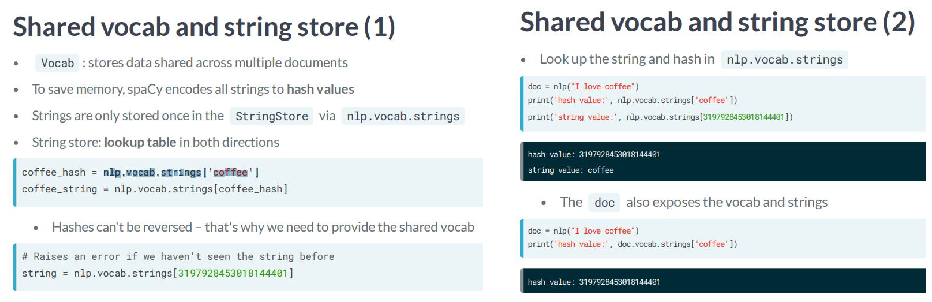

hash value: 3197928453018144401
string value: coffee


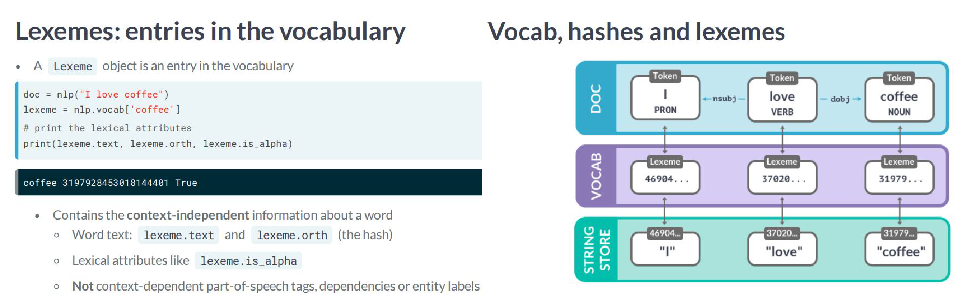

coffee 3197928453018144401 True


In [21]:
#vídeo

# Shared vocabulary and string store
plot_2('shared_vocab_1', 'shared_vocab_2')
coffee_hash = nlp.vocab.strings['coffee']
# coffee_string = nlp.vocab.strings[coffee_hash]   # Raises an error if we haven't seen the string before
# string = nlp.vocab.strings[3197928453018144401]

doc = nlp("I love coffee")

print("hash value:", nlp.vocab.strings['coffee'])
print("string value:", nlp.vocab.strings[3197928453018144401])

# Lexeme
plot_2('lexemes', 'vocab_hashes_lexemes')
doc = nlp("I love coffee")
lexeme = nlp.vocab['coffee']

# print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)


Exercício 2

In [22]:
# Strings to hashes

doc = nlp("cat PERSON")

# Look up the hash for the word "cat"
cat_hash = nlp.vocab.strings['cat']
print("cat_hash:", cat_hash)

# Look up the cat_hash to get the string
cat_string = nlp.vocab.strings[5439657043933447811]
print("cat_string:", cat_string, "\n")

##

# Look up the hash for the string label "PERSON"
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# Look up the person_hash to get the string
person_string = nlp.vocab.strings[380]
print(person_string)


cat_hash: 5439657043933447811
cat_string: cat 

380
PERSON


Exercício 3

In [23]:
# Vocab, hashes and lexemes

# Why does this code throw an error?

from spacy.lang.en import English
from spacy.lang.de import German

# Create an English and German nlp object
nlp = English()
nlp_de = German()

# Get the ID for the string 'Bowie'
bowie_id = nlp.vocab.strings['Bowie']
print(bowie_id)

# Look up the ID for 'Bowie' in the vocab
# print(nlp_de.vocab.strings[bowie_id])

print("""\nnlp_de.vocab.strings[bowie_id]  doesn't work because The string 'Bowie' isn't present in the German vocab, so the
hash can't be resolved in the string store. 

Hashes can't be reversed. To prevent this problem, add the word to the new vocab by processing a text or looking up the 
string, or use the same vocab to resolve the hash back to a string.""")


2644858412616767388

nlp_de.vocab.strings[bowie_id]  doesn't work because The string 'Bowie' isn't present in the German vocab, so the
hash can't be resolved in the string store. 

Hashes can't be reversed. To prevent this problem, add the word to the new vocab by processing a text or looking up the 
string, or use the same vocab to resolve the hash back to a string.


#### Exercício 4 - Data Structures (2) - Doc, Span and Token

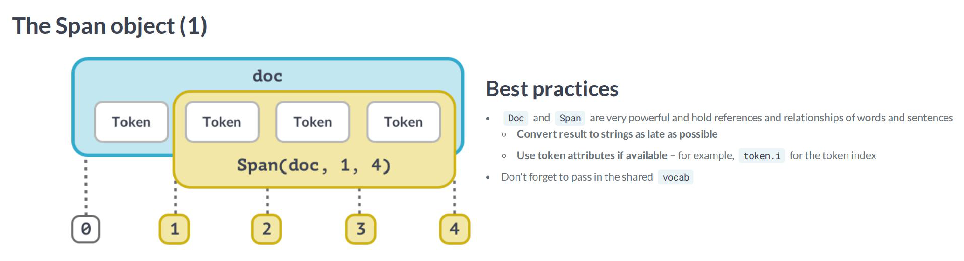

Hello world!
(Hello world,)


In [24]:
#vídeo

# The Doc object

# Create an nlp object
from spacy.lang.en import English
nlp = English()

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ['Hello', 'world', '!']
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

###########

plot_2('span_2', 'best_practices')

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a span manually
span = Span(doc, 0, 2)

# Create a span with a label
span_with_label = Span(doc, 0, 2, label="GREETING")

# Add span to the doc.ents
doc.ents = [span_with_label]

print(doc)
print(doc.ents)

Exercício 5

In [25]:
# Creating a Doc

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

###

# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

###

# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Oh, really?!"
words = ['Oh', ',', 'really', '?', '!']
spaces = [False, True, False, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)


spaCy is cool!
Go, get started!
Oh, really?!


Exercício 6

In [26]:
# Docs, spans and entities from scratch

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ['I', 'like', 'David', 'Bowie']
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

#####

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

#####

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])


I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


Exercício 7

In [27]:
# Data structures best practices

doc = nlp('Berlin is a nice city')

# # Get all tokens and part-of-speech tags
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == 'PROPN':
        # Check if the next token is a verb
        if pos_tags[index + 1] == 'VERB':
            print('Found a verb after a proper noun!')


print("""It only uses lists of strings instead of native token attributes. This is often less efficient, and can't express 
complex relationships.\n""")

################################################

for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == 'PROPN':
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == 'VERB':
            print('Found a verb after a proper noun!')
            

It only uses lists of strings instead of native token attributes. This is often less efficient, and can't express 
complex relationships.



#### Exercício 8 - Word vectors and similarity

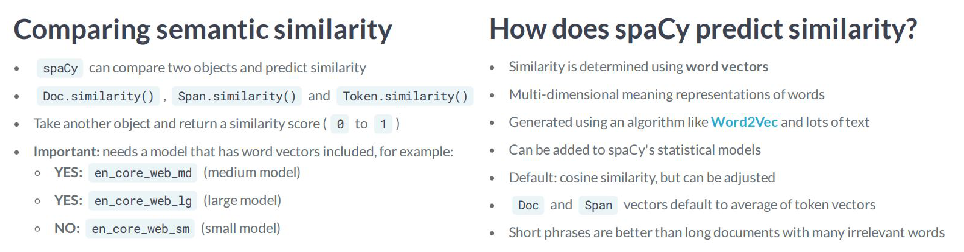

Similarity between 'I like fast food' & 'I like pizza': 0.8627203210548107
Similarity between 'pizza' & 'pasta': 0.7369545698165894
0.32531983166759537
Similarity between '..pizza and pasta'(span) & 'McDonalds sells burgers': 0.6199091710787739

Word vectors in spaCy: (banana)
[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8

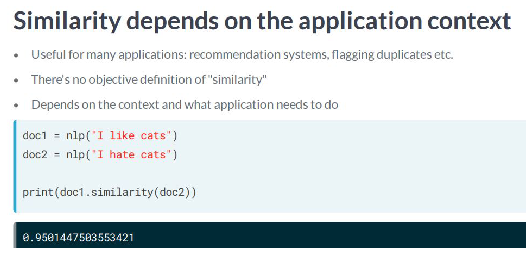

Similarity between 'I like cats' & 'I hate cats': 0.9501446702124066

Wall time: 36.4 s


In [28]:
%%time
#vídeo

plot_2('similarity', 'spacy_similarity')

# Similarity examples (1) <-------------------

# Load a larger model with vectors
import en_core_web_md

nlp = en_core_web_md.load()

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")

print("""Similarity between 'I like fast food' & 'I like pizza': {}""".format(doc1.similarity(doc2)))

# Compare two tokens
doc = nlp("I like pizza and pasta")

token1 = doc[2]
token2 = doc[4]
print("""Similarity between 'pizza' & 'pasta': {}""".format(token1.similarity(token2)))

# Similarity examples (2) <-------------------

# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]
print(doc.similarity(token))

# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print("""Similarity between '..pizza and pasta'(span) & 'McDonalds sells burgers': {}""".format(span.similarity(doc)))

############################################################################

print("\nWord vectors in spaCy: (banana)")

doc = nlp("I have a banana")

# Access the vector via the token.vector attribute
print(doc[3].vector)

#################################################################

plot_1('similarity_context', right=1.2)

doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print("""Similarity between 'I like cats' & 'I hate cats': {}\n""".format(doc1.similarity(doc2)))


Exercício 9

In [29]:
%%time

# Inspecting word vectors

# Load the en_core_web_md model
nlp = en_core_web_md.load()

# Process a text
doc = nlp("Two bananas in pyjamas")

# Get the vector for the token "bananas"
bananas_vector = doc[1].vector
print("Vector for the token 'bananas':\n", bananas_vector)

Vector for the token 'bananas':
 [-2.2009e-01 -3.0322e-02 -7.9859e-02 -4.6279e-01 -3.8600e-01  3.6962e-01
 -7.7178e-01 -1.1529e-01  3.3601e-02  5.6573e-01 -2.4001e-01  4.1833e-01
  1.5049e-01  3.5621e-01 -2.1508e-01 -4.2743e-01  8.1400e-02  3.3916e-01
  2.1637e-01  1.4792e-01  4.5811e-01  2.0966e-01 -3.5706e-01  2.3800e-01
  2.7971e-02 -8.4538e-01  4.1917e-01 -3.9181e-01  4.0434e-04 -1.0662e+00
  1.4591e-01  1.4643e-03  5.1277e-01  2.6072e-01  8.3785e-02  3.0340e-01
  1.8579e-01  5.9999e-02 -4.0270e-01  5.0888e-01 -1.1358e-01 -2.8854e-01
 -2.7068e-01  1.1017e-02 -2.2217e-01  6.9076e-01  3.6459e-02  3.0394e-01
  5.6989e-02  2.2733e-01 -9.9473e-02  1.5165e-01  1.3540e-01 -2.4965e-01
  9.8078e-01 -8.0492e-01  1.9326e-01  3.1128e-01  5.5390e-02 -4.2423e-01
 -1.4082e-02  1.2708e-01  1.8868e-01  5.9777e-02 -2.2215e-01 -8.3950e-01
  9.1987e-02  1.0180e-01 -3.1299e-01  5.5083e-01 -3.0717e-01  4.4201e-01
  1.2666e-01  3.7643e-01  3.2333e-01  9.5673e-02  2.5083e-01 -6.4049e-02
  4.2143e-01 -1.93

Exercício 10

In [30]:
# Comparing similarities

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

#############################

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books" 
similarity = token1.similarity(token2)
print(similarity)

#############################

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[12:15]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

print("""\nFeel free to experiment with comparing more objects, if you like. The similarities are not always this 
conclusive. Once you're getting serious about developing NLP applications that leverage semantic similarity, you might want
to train vectors on your own data, or tweak the similarity algorithm.""")

0.8789265574516525
0.22325327
0.75173926

Feel free to experiment with comparing more objects, if you like. The similarities are not always this 
conclusive. Once you're getting serious about developing NLP applications that leverage semantic similarity, you might want
to train vectors on your own data, or tweak the similarity algorithm.


#### Exercício 11 - Combining models and rules

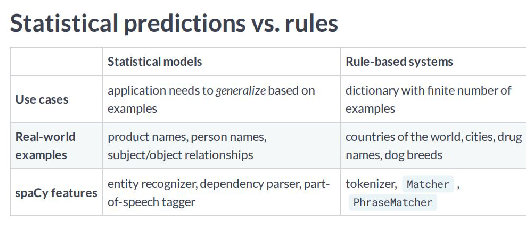

Recap: Rule-based Matching:

Adding statistical predictions:
Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


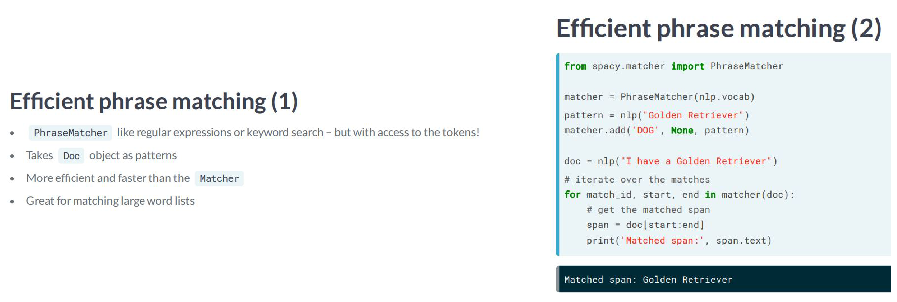

Matched span: Golden Retriever


In [31]:
#vídeo

plot_1('statistical_predictions', right=1.2)

###########################################################################

# Recap: Rule-based Matching
print("Recap: Rule-based Matching:")

# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{'LEMMA': 'love', 'POS': 'VERB'}, {'LOWER': 'cats'}]
matcher.add('LOVE_CATS', None, pattern)

# Operators can specify how often a token should be matched
pattern = [{'TEXT': 'very', 'OP': '+'}, {'TEXT': 'happy'}]

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

##################

print("\nAdding statistical predictions:")

matcher.add('DOG', None, [{'LOWER': 'golden'}, {'LOWER': 'retriever'}])

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print('Matched span:', span.text)
    # Get the span's root token and root head token
    print('Root token:', span.root.text)
    print('Root head token:', span.root.head.text)
    # Get the previous token and its POS tag
    print('Previous token:', doc[start - 1].text, doc[start - 1].pos_)
    
###########################################################################

plot_2('efficient_phrase_matching', 'efficient_phrase_matching_2')

from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")

matcher.add('DOG', None, pattern)

doc = nlp("I have a Golden Retriever")

# iterate over the matches
for match_id, start, end in matcher(doc):
    # get the matched span
    span = doc[start:end]
    print('Matched span:', span.text)


Exercício 12

In [32]:
# Debugging patterns (1)

doc = nlp("Can Silicon Valley workers rein in big tech from within?")
pattern = [{'LOWER': 'silicon'}, {'TEXT': ' '}, {'LOWER': 'valley'}]

matcher = Matcher(nlp.vocab)
matcher.add('ex', None, pattern)
print(matcher(doc))

# Why does this pattern not match the tokens "Silicon Valley" in the doc?

print("""Because the tokenizer doesn't create tokens for single spaces, so there's no token with the value ' ' in between.
""")

pattern = [{'LOWER': 'silicon'}, {'LOWER': 'valley'}]  # assim já dava

[]
Because the tokenizer doesn't create tokens for single spaces, so there's no token with the value ' ' in between.



Exercício 13

In [33]:
# Debugging patterns (2)

# Both patterns in this exercise contain mistakes and won't match as expected. Can you fix them?

nlp = en_core_web_md.load()
doc = nlp("Twitch Prime, the perks program for Amazon Prime members offering free loot, games and other benefits, is \
          ditching one of its best features: ad-free viewing. According to an email sent out to Amazon Prime members today,\
          ad-free viewing will no longer be included as a part of Twitch Prime for new members, beginning on September 14. \
          However, members with existing annual subscriptions will be able to continue to enjoy ad-free viewing until their\
          subscription comes up for renewal. Those with monthly subscriptions will have access to ad-free viewing until \
          October 15.")

# 1) Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
# 2) Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

# Create the match patterns
pattern1 = [{'LOWER': 'amazon'}, {'IS_TITLE': True, 'POS': 'PROPN'}]
pattern2 = [{'LOWER': 'ad'}, {'TEXT': '-'}, {'LOWER': 'free'}, {'POS': 'NOUN'}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add('PATTERN1', None, pattern1)
matcher.add('PATTERN2', None, pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)


PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


Exercício 14

In [34]:
# Efficient phrase matching

doc = nlp("Czech Republic may help Slovakia protect its airspace")
COUNTRIES = ['Afghanistan', 'Åland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 
             'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
              'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
             'Bolivia (Plurinational State of)', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana',
              'Bouvet Island', 'Brazil','British Indian Ocean Territory', 'United States Minor Outlying Islands',
              'Virgin Islands (British)', 'Virgin Islands (U.S.)', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 
             'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cabo Verde', 'Cayman Islands', 'Central African Republic',
             'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo',
              'Congo (Democratic Republic of the)', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus',
              'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
              'Equatorial Guinea', 'Eritrea','Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji',
              'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia',
              'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 
             'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands',
              'Holy See', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', "Côte d'Ivoire",
              'Iran (Islamic Republic of)', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan',
             'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 
             "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein',
              'Lithuania', 'Luxembourg', 'Macao', 'Macedonia (the former Yugoslav Republic of)', 'Madagascar', 'Malawi',
              'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 
             'Mayotte', 'Mexico', 'Micronesia (Federated States of)', 'Moldova (Republic of)', 'Monaco', 'Mongolia',
              'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands',
              'New Caledonia','New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 
             "Korea (Democratic People's Republic of)", 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
              'Palestine, State of', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland',
              'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Kosovo', 'Réunion', 'Romania', 'Russian Federation',
              'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis',
              'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
              'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
             'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia',
              'South Africa', 'South Georgia and the South Sandwich Islands', 'Korea (Republic of)', 'South Sudan', 'Spain',
              'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland',
             'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste',
              'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan',
             'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
             'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Uruguay', 'Uzbekistan',
              'Vanuatu', 'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Wallis and Futuna', 'Western Sahara', 'Yemen',
              'Zambia', 'Zimbabwe']

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])


[Czech Republic, Slovakia]


Exercício 15

In [35]:
# Extracting countries and relationships

text = """After the Cold War, the UN saw a radical expansion in its peacekeeping duties, taking on more missions in ten 
years than it had in the previous four decades.Between 1988 and 2000, the number of adopted Security Council resolutions
more than doubled, and the peacekeeping budget increased more than tenfold. The UN negotiated an end to the Salvadoran Civil
War, launched a successful peacekeeping mission in Namibia, and oversaw democratic elections in post-apartheid South Africa
and post-Khmer Rouge Cambodia. In 1991, the UN authorized a US-led coalition that repulsed the Iraqi invasion of Kuwait. 
Brian Urquhart, Under-Secretary-General from 1971 to 1985, later described the hopes raised by these successes as a "false 
renaissance" for the organization, given the more troubled missions that followed. Though the UN Charter had been written
primarily to prevent aggression by one nation against another, in the early 1990s the UN faced a number of simultaneous,
serious crises within nations such as Somalia, Haiti, Mozambique, and the former Yugoslavia. The UN mission in Somalia was
widely viewed as a failure after the US withdrawal following casualties in the Battle of Mogadishu, and the UN mission to
Bosnia faced "worldwide ridicule" for its indecisive and confused mission in the face of ethnic cleansing. In 1994, the UN
Assistance Mission for Rwanda failed to intervene in the Rwandan genocide amid indecision in the Security Council. 
Beginning in the last decades of the Cold War, American and European critics of the UN condemned the organization for 
perceived mismanagement and corruption. In 1984, the US President, Ronald Reagan, withdrew his nation\'s funding from UNESCO
(the United Nations Educational, Scientific and Cultural Organization, founded 1946) over allegations of mismanagement, 
followed by Britain and Singapore. Boutros Boutros-Ghali, Secretary-General from 1992 to 1996, initiated a reform of the 
Secretariat, reducing the size of the organization somewhat. His successor, Kofi Annan (1997–2006), initiated further 
management reforms in the face of threats from the United States to withhold its UN dues. In the late 1990s and 2000s,
international interventions authorized by the UN took a wider variety of forms. The UN mission in the Sierra Leone Civil
War of 1991–2002 was supplemented by British Royal Marines, and the invasion of Afghanistan in 2001 was overseen by NATO. 
In 2003, the United States invaded Iraq despite failing to pass a UN Security Council resolution for authorization, 
prompting a new round of questioning of the organization\'s effectiveness. Under the eighth Secretary-General, Ban Ki-moon,
the UN has intervened with peacekeepers in crises including the War in Darfur in Sudan and the Kivu conflict in the 
Democratic Republic of Congo and sent observers and chemical weapons inspectors to the Syrian Civil War. In 2013, an
internal review of UN actions in the final battles of the Sri Lankan Civil War in 2009 concluded that the organization had
suffered "systemic failure". One hundred and one UN personnel died in the 2010 Haiti earthquake, the worst loss of life in
the organization\'s history. The Millennium Summit was held in 2000 to discuss the UN\'s role in the 21st century. The 
three day meeting was the largest gathering of world leaders in history, and culminated in the adoption by all member
states of the Millennium Development Goals (MDGs), a commitment to achieve international development in areas such as 
poverty reduction, gender equality, and public health. Progress towards these goals, which were to be met by 2015, was 
ultimately uneven. The 2005 World Summit reaffirmed the UN\'s focus on promoting development, peacekeeping, human rights,
and global security. The Sustainable Development Goals were launched in 2015 to succeed the Millennium Development Goals. 
In addition to addressing global challenges, the UN has sought to improve its accountability and democratic legitimacy by 
engaging more with civil society and fostering a global constituency. In an effort to enhance transparency, in 2016 the 
organization held its first public debate between candidates for Secretary-General. On 1 January 2017, Portuguese diplomat 
António Guterres, who previously served as UN High Commissioner for Refugees, became the ninth Secretary-General. Guterres
has highlighted several key goals for his administration, including an emphasis on diplomacy for preventing conflicts, more
effective peacekeeping efforts, and streamlining the organization to be more responsive and versatile to global needs."""

matcher = PhraseMatcher(nlp.vocab)
# patterns = list(nlp.pipe(COUNTRIES))
# matcher.add('COUNTRY', None, *patterns)

from spacy.tokens import Span

#########################################################################################################################

In [36]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == 'GPE'])

[('Namibia', 'GPE'), ('South Africa', 'GPE'), ('US', 'GPE'), ('Kuwait', 'GPE'), ('Somalia', 'GPE'), ('Haiti', 'GPE'), ('Mozambique', 'GPE'), ('Yugoslavia', 'GPE'), ('Somalia', 'GPE'), ('US', 'GPE'), ('Bosnia', 'GPE'), ('Rwanda', 'GPE'), ('US', 'GPE'), ('Britain', 'GPE'), ('Singapore', 'GPE'), ('the United States', 'GPE'), ('Afghanistan', 'GPE'), ('the United States', 'GPE'), ('Iraq', 'GPE'), ('Darfur', 'GPE'), ('Sudan', 'GPE'), ('Kivu', 'GPE'), ('Democratic Republic of Congo', 'GPE'), ('Haiti', 'GPE')]


In [37]:
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)
matcher(doc)

[(4000319556510314152, 77, 78),
 (4000319556510314152, 87, 89),
 (4000319556510314152, 95, 96),
 (4000319556510314152, 114, 115),
 (4000319556510314152, 194, 195),
 (4000319556510314152, 196, 197),
 (4000319556510314152, 198, 199),
 (4000319556510314152, 209, 210),
 (4000319556510314152, 263, 264),
 (4000319556510314152, 348, 349),
 (4000319556510314152, 434, 436),
 (4000319556510314152, 452, 453),
 (4000319556510314152, 468, 469),
 (4000319556510314152, 521, 522),
 (4000319556510314152, 532, 533),
 (4000319556510314152, 590, 591)]

In [38]:
# Create a doc and find matches in it
doc = nlp(text)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE" and overwrite the doc.ents
    span = Span(doc, start, end, label='GPE')
#     doc.ents = list(doc.ents) + [span]    ############################## ver isto
    
    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, '-->', span.text)
    

in --> Namibia
in --> South Africa
elections --> Cambodia
of --> Kuwait
as --> Somalia
Somalia --> Haiti
Haiti --> Mozambique
in --> Somalia
for --> Rwanda
Britain --> Singapore
War --> Sierra Leone
of --> Afghanistan
invaded --> Iraq
in --> Sudan
of --> Congo
earthquake --> Haiti


# Chapter 3 - Processing Pipelines

This chapter will show you to everything you need to know about spaCy's processing pipeline. You'll learn what goes on under the hood when you process a text, how to write your own components and add them to the pipeline, and how to use custom attributes to add your own meta data to the documents, spans and tokens.

#### Exercício 1 - Processing pipelines

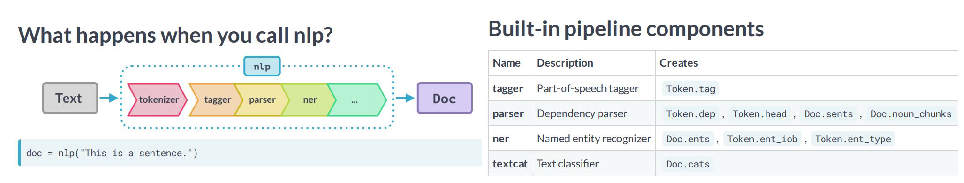

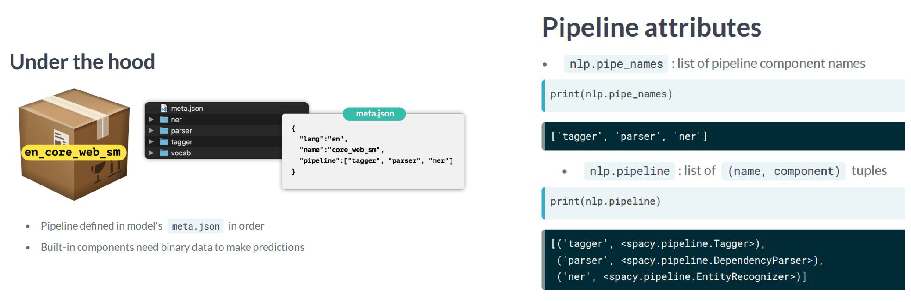

List of pipeline component names:  ['tagger', 'parser', 'ner']

List of (name, component) tuples:  [('tagger', <spacy.pipeline.pipes.Tagger object at 0x000001E680C02518>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x000001E6A9CD15E8>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000001E6A9CD1648>)]


In [39]:
#vídeo

plot_2('nlp', 'built_in')
plot_2('under_the_hood', 'pipeline_attributes')

# list of pipeline component names
print("List of pipeline component names: ", nlp.pipe_names)

# list of (name, component) tuples
print("\nList of (name, component) tuples: ", nlp.pipeline)

Exercício 2

In [40]:
# What happens when you call nlp?

doc = nlp("This is a sentence.")

# What does spaCy do when you call nlp on a string of text? 
print("""Tokenize the text and apply each pipeline component in order.""")

Tokenize the text and apply each pipeline component in order.


Exercício 3

In [41]:
# Inspecting the pipeline

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Print the names of the pipeline components
print(nlp.pipe_names, "\n")

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline)

['tagger', 'parser', 'ner'] 

[('tagger', <spacy.pipeline.pipes.Tagger object at 0x000001E6D7780320>), ('parser', <spacy.pipeline.pipes.DependencyParser object at 0x000001E680782828>), ('ner', <spacy.pipeline.pipes.EntityRecognizer object at 0x000001E680782888>)]


#### Exercício 4 - Custom pipeline components

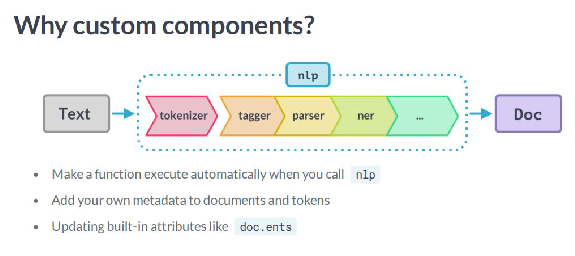

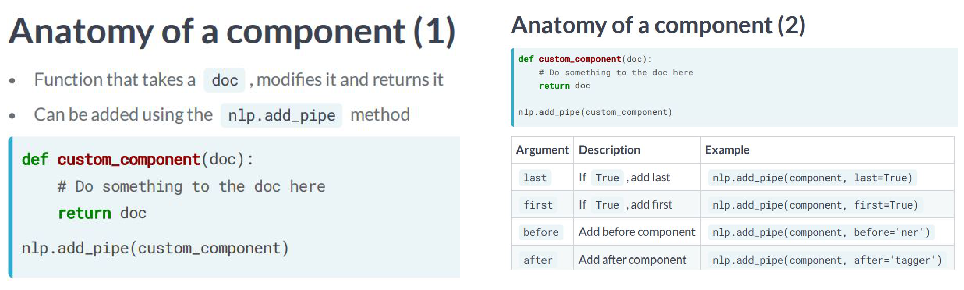

Example: a simple component(1):

Pipeline: ['custom_component', 'tagger', 'parser', 'ner']
Doc length: 3


In [42]:
#vídeo

plot_1('custom_components', right=1.3)
plot_2('anatomy_component_1', 'anatomy_component_2', wspace=0.1)

# Example: a simple component(1)
print("Example: a simple component(1):\n")

# Create the nlp object
nlp = spacy.load('en_core_web_sm')

# Define a custom component
def custom_component(doc):
    # Print the doc's length
    print('Doc length:', len(doc))
    # Return the doc object
    return doc   # ---> don't forget to return doc so that it can process the next component in the pipeline

# Add the component first in the pipeline
nlp.add_pipe(custom_component, first=True)

# Print the pipeline component names
print('Pipeline:', nlp.pipe_names)

# Process a text
doc = nlp("Hello world!")


Exercício 5

In [43]:
# Use cases for custom components

# Which of these problems can be solved by custom pipeline components? Choose all that apply

print("""2. computing your own values based on tokens and their attributes
3. adding named entities, for example based on a dictionary""")

2. computing your own values based on tokens and their attributes
3. adding named entities, for example based on a dictionary


Exercício 6

In [44]:
# Simple components

# Define the custom component
def length_component(doc):
    # Get the doc's length
    doc_length = len(doc)
    print("This document is {} tokens long.".format(doc_length))
    # Return the doc
    return doc
  
# Load the small English model and Add the component first in the pipeline
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(length_component, first=True)

# Process a text
doc = nlp("This is a sentence.")

nlp.pipe_names

This document is 5 tokens long.


['length_component', 'tagger', 'parser', 'ner']

Exercício 7

In [45]:
# Complex components

nlp = spacy.load('en_core_web_sm')
matcher = PhraseMatcher(nlp.vocab)
animal_patterns = list(nlp.pipe(['Golden Retriever', 'cat', 'turtle', 'Rattus norvegicus']))
matcher.add('ANIMAL', None, *animal_patterns)


# Define the custom component
def animal_component(doc):
    # Create a Span for each match and assign the label 'ANIMAL' and overwrite the doc.ents with the matched spans
    doc.ents = [Span(doc, start, end, label='ANIMAL') for match_id, start, end in matcher(doc)]
    return doc
    
# Add the component to the pipeline after the 'ner' component 
nlp.add_pipe(animal_component, after='ner')

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])


[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


#### Exercício 8 - Extension attributes

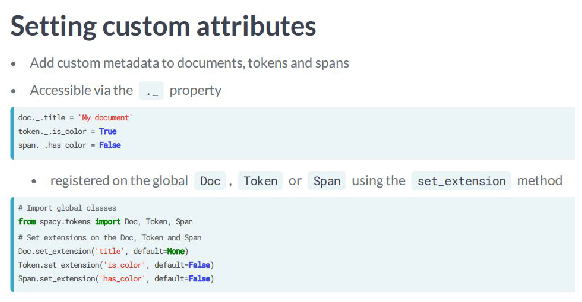

Extension attribute types: 1) Attribute extensions; 2) Property extensions; 3) Method extensions



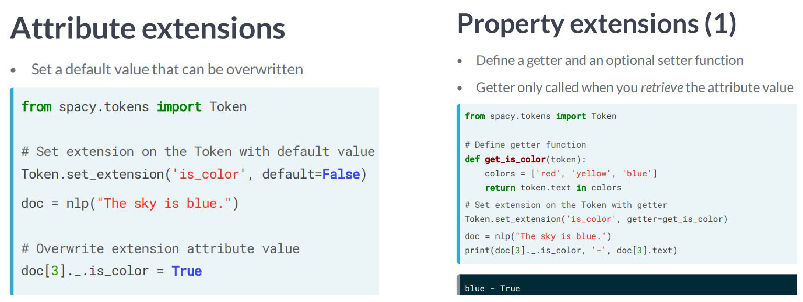

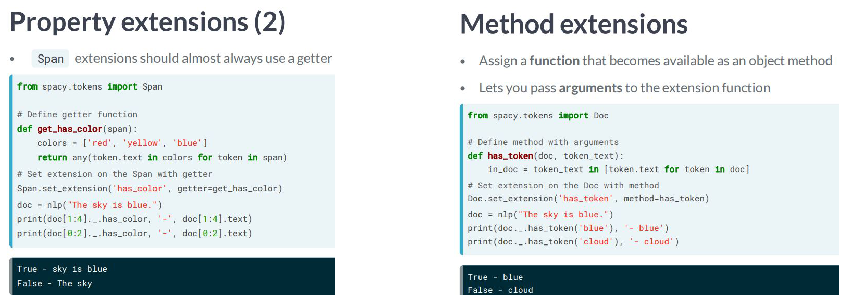

In [46]:
#vídeo

plot_1('custom_attributes', right=1.7)

# Import global classes
from spacy.tokens import Doc, Token, Span

# Extension attribute types
print("""Extension attribute types: 1) Attribute extensions; 2) Property extensions; 3) Method extensions\n""")

plot_2('attribute_extensions', 'property_extensions_1', right=2)
plot_2('property_extensions_2', 'method_extensions')

# Remember that if you run your code more than once, you might see an error message that the extension already exists. 
# That's because it will re-run your code in the same session. To solve this, you can set force=True on set_extension,
# or reload to start a new Python session.

In [47]:
from spacy.tokens import Doc, Token, Span

# 1) Attribute extensions

# Set extension on the Token with default value
Token.set_extension('is_color', default=False, force=True)
doc = nlp("The sky is blue.")
# Overwrite extension attribute value
doc[3]._.is_color = True

####################################################

# 2) Property extensions

# Define getter function
def get_is_color(token):
    colors = ['red', 'yellow', 'blue']
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension('is_color', getter=get_is_color, force=True)
doc = nlp("The sky is blue.")
print(doc[3]._.is_color, '-', doc[3].text)

# Define getter function
def get_has_color(span):
    colors = ['red', 'yellow', 'blue']
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension('has_color', getter=get_has_color, force=True)
doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, '-', doc[1:4].text)
print(doc[0:2]._.has_color, '-', doc[0:2].text)
print("")
####################################################

# 3) Method extensions

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    
# Set extension on the Doc with method
Doc.set_extension('has_token', method=has_token, force=True)
doc = nlp("The sky is blue.")
print(doc._.has_token('blue'), '- blue')
print(doc._.has_token('cloud'), '- cloud')

True - blue
True - sky is blue
False - The sky

None - blue
None - cloud


Exercício 9

In [48]:
# Setting extension attributes (1)

# Register the Token extension attribute 'is_country' with the default value False
Token.set_extension('is_country', default=False, force=True)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc], "\n")

#####################################################################################

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]
  
# Register the Token property extension 'reversed' with the getter get_reversed
Token.set_extension('reversed', getter=get_reversed, force=True)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")

for token in doc:
    print('reversed:', token._.reversed)


[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)] 

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


Exercício 10

In [49]:
# Setting extension attributes (2)

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)

# Register the Doc property extension 'has_number' with the getter get_has_number
Doc.set_extension('has_number', getter=get_has_number, force=True)

# Process the text and check the custom has_number attribute 
doc = nlp("The museum closed for five years in 2012.")
print('has_number:', doc._.has_number)

#####################################################

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return '<{tag}>{text}</{tag}>'.format(tag=tag, text=span.text)

# Register the Span property extension 'to_html' with the method to_html
Span.set_extension('to_html', method=to_html)

# Process the text and call the to_html method on the span with the tag name 'strong'
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html('strong'))


has_number: True
<strong>Hello world</strong>


Exercício 11

In [50]:
# Entities and extensions

nlp = en_core_web_md.load()

def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ('PERSON', 'ORG', 'GPE', 'LOCATION'):
        entity_text = span.text.replace(' ', '_')
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text

# Set the Span extension wikipedia_url using get getter get_wikipedia_url
Span.set_extension('wikipedia_url', getter=get_wikipedia_url, force=True)

doc = nlp("In over fifty years from his very first recordings right through to his last album, David Bowie was at the \
vanguard of contemporary culture.")

for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)
    

over fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


Exercício 12

In [51]:
capitals = {'Afghanistan': 'Kabul', 'Albania': 'Tirana', 'Algeria': 'Algiers', 'American Samoa': 'Pago Pago',
             'Andorra': 'Andorra la Vella', 'Angola': 'Luanda', 'Anguilla': 'The Valley', 'Antarctica': '',
             'Antigua and Barbuda': "Saint John's", 'Argentina': 'Buenos Aires', 'Armenia': 'Yerevan',
            'Aruba': 'Oranjestad', 'Australia': 'Canberra', 'Austria': 'Vienna', 'Azerbaijan': 'Baku', 'Bahamas': 'Nassau',
             'Bahrain': 'Manama', 'Bangladesh': 'Dhaka', 'Barbados': 'Bridgetown', 'Belarus': 'Minsk', 
            'Belgium': 'Brussels', 'Belize': 'Belmopan', 'Benin': 'Porto-Novo', 'Bermuda': 'Hamilton', 'Bhutan': 'Thimphu',
             'Bolivia (Plurinational State of)': 'Sucre', 'Bonaire, Sint Eustatius and Saba': 'Kralendijk',
            'Bosnia and Herzegovina': 'Sarajevo', 'Botswana': 'Gaborone', 'Bouvet Island': '', 'Brazil': 'Brasília',
             'British Indian Ocean Territory': 'Diego Garcia', 'Brunei Darussalam': 'Bandar Seri Begawan',
            'Bulgaria': 'Sofia', 'Burkina Faso': 'Ouagadougou','Burundi': 'Bujumbura', 'Cabo Verde': 'Praia',
            'Cambodia': 'Phnom Penh', 'Cameroon': 'Yaoundé', 'Canada': 'Ottawa', 'Cayman Islands': 'George Town',
             'Central African Republic': 'Bangui', 'Chad': "N'Djamena", 'Chile': 'Santiago', 'China': 'Beijing',
             'Christmas Island': 'Flying Fish Cove', 'Cocos (Keeling) Islands': 'West Island', 'Colombia': 'Bogotá',
             'Comoros': 'Moroni', 'Congo': 'Brazzaville', 'Congo (Democratic Republic of the)': 'Kinshasa',
            'Cook Islands': 'Avarua', 'Costa Rica': 'San José', 'Croatia': 'Zagreb', 'Cuba': 'Havana',
            'Curaçao': 'Willemstad', 'Cyprus': 'Nicosia', 'Czech Republic': 'Prague', "Côte d'Ivoire": 'Yamoussoukro',
             'Denmark': 'Copenhagen', 'Djibouti': 'Djibouti', 'Dominica': 'Roseau', 'Dominican Republic': 'Santo Domingo',
             'Ecuador': 'Quito', 'Egypt': 'Cairo', 'El Salvador': 'San Salvador', 'Equatorial Guinea': 'Malabo',
            'Eritrea': 'Asmara', 'Estonia': 'Tallinn', 'Ethiopia': 'Addis Ababa', 'Falkland Islands (Malvinas)': 'Stanley',
             'Faroe Islands': 'Tórshavn', 'Fiji': 'Suva', 'Finland': 'Helsinki', 'France': 'Paris',
            'French Guiana': 'Cayenne', 'French Polynesia': 'Papeetē', 'French Southern Territories': 'Port-aux-Français',
             'Gabon': 'Libreville', 'Gambia': 'Banjul', 'Georgia': 'Tbilisi', 'Germany': 'Berlin', 'Ghana': 'Accra',
             'Gibraltar': 'Gibraltar', 'Greece': 'Athens', 'Greenland': 'Nuuk', 'Grenada': "St. George's",
            'Guadeloupe': 'Basse-Terre', 'Guam': 'Hagåtña', 'Guatemala': 'Guatemala City', 'Guernsey': 'St. Peter Port',
             'Guinea': 'Conakry', 'Guinea-Bissau': 'Bissau', 'Guyana': 'Georgetown', 'Haiti': 'Port-au-Prince',
             'Heard Island and McDonald Islands': '', 'Holy See': 'Rome', 'Honduras': 'Tegucigalpa',
            'Hong Kong': 'City of Victoria', 'Hungary': 'Budapest', 'Iceland': 'Reykjavík', 'India': 'New Delhi',
             'Indonesia': 'Jakarta', 'Iran (Islamic Republic of)': 'Tehran', 'Iraq': 'Baghdad', 'Ireland': 'Dublin',
             'Isle of Man': 'Douglas', 'Israel': 'Jerusalem', 'Italy': 'Rome', 'Jamaica': 'Kingston', 'Japan': 'Tokyo',
             'Jersey': 'Saint Helier', 'Jordan': 'Amman', 'Kazakhstan': 'Astana', 'Kenya': 'Nairobi',
            'Kiribati': 'South Tarawa', "Korea (Democratic People's Republic of)": 'Pyongyang',
            'Korea (Republic of)': 'Seoul', 'Kuwait': 'Kuwait City', 'Kyrgyzstan': 'Bishkek',
            "Lao People's Democratic Republic": 'Vientiane', 'Latvia': 'Riga', 'Lebanon': 'Beirut', 'Lesotho': 'Maseru',
             'Liberia': 'Monrovia', 'Libya': 'Tripoli', 'Liechtenstein': 'Vaduz', 'Lithuania': 'Vilnius',
            'Luxembourg': 'Luxembourg', 'Macao': '', 'Macedonia (the former Yugoslav Republic of)': 'Skopje',
             'Madagascar': 'Antananarivo', 'Malawi': 'Lilongwe', 'Malaysia': 'Kuala Lumpur', 'Maldives': 'Malé',
             'Mali': 'Bamako', 'Malta': 'Valletta', 'Marshall Islands': 'Majuro', 'Martinique': 'Fort-de-France',
             'Mauritania': 'Nouakchott', 'Mauritius': 'Port Louis', 'Mayotte': 'Mamoudzou', 'Mexico': 'Mexico City',
             'Micronesia (Federated States of)': 'Palikir', 'Moldova (Republic of)': 'Chișinău', 'Monaco': 'Monaco',
             'Mongolia': 'Ulan Bator', 'Montenegro': 'Podgorica', 'Montserrat': 'Plymouth', 'Morocco': 'Rabat',
             'Mozambique': 'Maputo', 'Myanmar': 'Naypyidaw', 'Namibia': 'Windhoek', 'Nauru': 'Yaren', 'Nepal': 'Kathmandu',
             'Netherlands': 'Amsterdam', 'New Caledonia': 'Nouméa', 'New Zealand': 'Wellington', 'Nicaragua': 'Managua',
             'Niger': 'Niamey', 'Nigeria': 'Abuja', 'Niue': 'Alofi', 'Norfolk Island': 'Kingston',
            'Northern Mariana Islands': 'Saipan', 'Norway': 'Oslo', 'Oman': 'Muscat', 'Pakistan': 'Islamabad',
            'Palau': 'Ngerulmud', 'Palestine, State of': 'Ramallah', 'Panama': 'Panama City',
            'Papua New Guinea': 'Port Moresby', 'Paraguay': 'Asunción', 'Peru': 'Lima', 'Philippines': 'Manila',
            'Pitcairn': 'Adamstown', 'Poland': 'Warsaw', 'Portugal': 'Lisbon', 'Puerto Rico': 'San Juan', 'Qatar': 'Doha',
             'Republic of Kosovo': 'Pristina', 'Romania': 'Bucharest', 'Russian Federation': 'Moscow', 'Rwanda': 'Kigali',
             'Réunion': 'Saint-Denis', 'Saint Barthélemy': 'Gustavia', 
            'Saint Helena, Ascension and Tristan da Cunha': 'Jamestown', 'Saint Kitts and Nevis': 'Basseterre',
             'Saint Lucia': 'Castries', 'Saint Martin (French part)': 'Marigot',
            'Saint Pierre and Miquelon': 'Saint-Pierre', 'Saint Vincent and the Grenadines': 'Kingstown', 'Samoa': 'Apia',
             'San Marino': 'City of San Marino', 'Sao Tome and Principe': 'São Tomé', 'Saudi Arabia': 'Riyadh',
             'Senegal': 'Dakar', 'Serbia': 'Belgrade', 'Seychelles': 'Victoria', 'Sierra Leone': 'Freetown',
             'Singapore': 'Singapore', 'Sint Maarten (Dutch part)': 'Philipsburg', 'Slovakia': 'Bratislava',
            'Slovenia': 'Ljubljana', 'Solomon Islands': 'Honiara', 'Somalia': 'Mogadishu', 'South Africa': 'Pretoria',
             'South Georgia and the South Sandwich Islands': 'King Edward Point', 'South Sudan': 'Juba', 'Spain': 'Madrid',
             'Sri Lanka': 'Colombo', 'Sudan': 'Khartoum', 'Suriname': 'Paramaribo',
            'Svalbard and Jan Mayen': 'Longyearbyen', 'Swaziland': 'Lobamba', 'Sweden': 'Stockholm', 'Switzerland': 'Bern',
             'Syrian Arab Republic': 'Damascus', 'Taiwan': 'Taipei', 'Tajikistan': 'Dushanbe',
            'Tanzania, United Republic of': 'Dodoma', 'Thailand': 'Bangkok', 'Timor-Leste': 'Dili', 'Togo': 'Lomé',
             'Tokelau': 'Fakaofo', 'Tonga': "Nuku'alofa", 'Trinidad and Tobago': 'Port of Spain', 'Tunisia': 'Tunis',
             'Turkey': 'Ankara', 'Turkmenistan': 'Ashgabat', 'Turks and Caicos Islands': 'Cockburn Town',
            'Tuvalu': 'Funafuti', 'Uganda': 'Kampala', 'Ukraine': 'Kiev', 'United Arab Emirates': 'Abu Dhabi',
             'United Kingdom of Great Britain and Northern Ireland': 'London', 'United States Minor Outlying Islands': '',
             'United States of America': 'Washington, D.C.', 'Uruguay': 'Montevideo', 'Uzbekistan': 'Tashkent',
             'Vanuatu': 'Port Vila', 'Venezuela (Bolivarian Republic of)': 'Caracas', 'Viet Nam': 'Hanoi',
             'Virgin Islands (British)': 'Road Town', 'Virgin Islands (U.S.)': 'Charlotte Amalie',
            'Wallis and Futuna': 'Mata-Utu', 'Western Sahara': 'El Aaiún', 'Yemen': "Sana'a", 'Zambia': 'Lusaka',
             'Zimbabwe': 'Harare', 'Åland Islands': 'Mariehamn'}

In [52]:
# Components with extensions

# Extension attributes are especially powerful if they're combined with custom pipeline components. In this exercise, 
# you'll write a pipeline component that finds country names and a custom extension attribute that returns a country's 
# capital, if available.

nlp = spacy.load('en_core_web_sm')
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))  # ver atrás a lista
matcher.add('COUNTRY', None, *patterns)

###########################################################################

def countries_component(doc):
    # Create an entity Span with the label 'GPE' for all matches
    doc.ents = [Span(doc, start, end, label='GPE') for match_id, start, end in matcher(doc)]
    return doc

# Add the component to the pipeline
nlp.add_pipe(countries_component)
print("pipe_names: {}\n".format(nlp.pipe_names))

# Register capital and getter that looks up the span text in country capitals
Span.set_extension('capital', getter=lambda span: capitals.get(span.text), force=True)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])


pipe_names: ['tagger', 'parser', 'ner', 'countries_component']

[('Czech Republic', 'GPE', 'Prague'), ('Slovakia', 'GPE', 'Bratislava')]


#### Exercício 13 - Scaling and performance

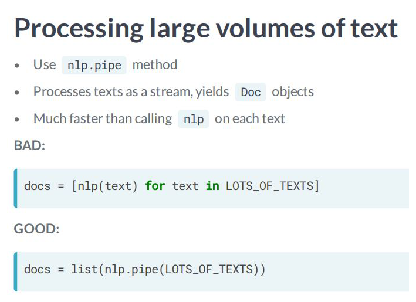

Passing in context:
This is a text 15
And another text 16


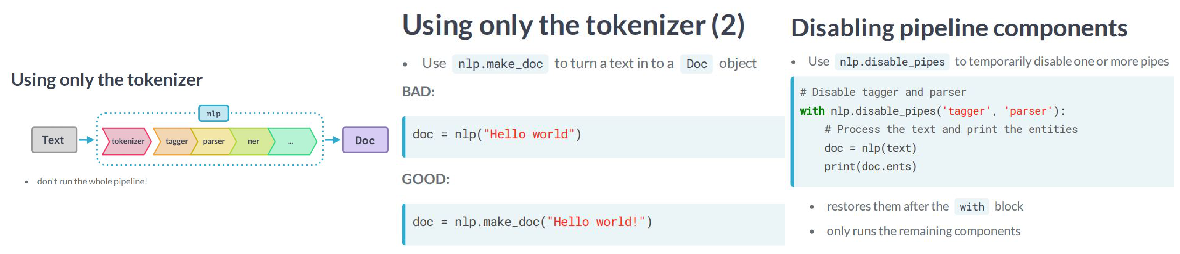

(Namibia, South Africa, Cambodia, Kuwait, Somalia, Haiti, Mozambique, Somalia, Rwanda, Singapore, Sierra Leone, Afghanistan, Iraq, Sudan, Congo, Haiti)


In [53]:
#vídeo

plot_1('processing_large_text')

# Passing in context(1)
print("Passing in context:")

# - Setting as_tuples=True on nlp.pipe lets you pass in (text, context) tuples
# - Yields (doc, context) tuples
# - Useful for associating metadata with the doc

data = [('This is a text', {'id': 1, 'page_number': 15}), 
        ('And another text', {'id': 2, 'page_number': 16}),]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context['page_number'])
    
# Passing in context(2)
from spacy.tokens import Doc

Doc.set_extension('id', default=None, force=True)
Doc.set_extension('page_number', default=None, force=True)

data = [('This is a text', {'id': 1,'page_number': 15}),
        ('And another text', {'id': 2,'page_number': 16}),]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context['id']
    doc._.page_number = context['page_number']

####################################

plot_3('only_tokenizer', 'only_tokenizer_2', 'disabling_pipe')

# Disable tagger and parser
with nlp.disable_pipes('tagger','parser'):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)


Exercício 14

In [54]:
# Processing streams

TEXTS = ['McDonalds is my favorite restaurant.',
 'Here I thought @McDonalds only had precooked burgers but it seems they only have not cooked ones?? I have no time to get\
 sick..',
 'People really still eat McDonalds :(',
 'The McDonalds in Spain has chicken wings. My heart is so happy ',
 '@McDonalds Please bring back the most delicious fast food sandwich of all times!!....The Arch Deluxe :P',
 'please hurry and open. I WANT A #McRib SANDWICH SO BAD! :D',
 'This morning i made a terrible decision by gettin mcdonalds and now my stomach is payin for it']


# Process the texts and print the adjectives
for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == 'ADJ'])
    
print(" ")

# Process the texts and print the entities
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

####################################################################

people = ['David Bowie', 'Angela Merkel', 'Lady Gaga']

# Create a list of patterns for the PhraseMatcher
patterns = list(nlp.pipe(people))
patterns

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
[]
['terrible', 'gettin', 'payin']
 
() () () (Spain,) () () ()


[David Bowie, Angela Merkel, Lady Gaga]

Exercício 15

In [55]:
# Processing data with context

# In this exercise, you'll be using custom attributes to add author and book meta information to quotes.
# A list of (text, context) examples is available as the variable DATA. The texts are quotes from famous books, and the
# contexts dictionaries with the keys 'author' and 'book'.

DATA = [('One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a \
horrible vermin.',  {'author': 'Franz Kafka', 'book': 'Metamorphosis'}),
 ("I know not all that may be coming, but be it what it will, I'll go to it laughing.",
  {'author': 'Herman Melville', 'book': 'Moby-Dick or, The Whale'}),
 ('It was the best of times, it was the worst of times.',
  {'author': 'Charles Dickens', 'book': 'A Tale of Two Cities'}),
 ('The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of \
 everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous \
 yellow roman candles exploding like spiders across the stars.',
  {'author': 'Jack Kerouac', 'book': 'On the Road'}),
 ('It was a bright cold day in April, and the clocks were striking thirteen.',
  {'author': 'George Orwell', 'book': '1984'}),
 ('Nowadays people know the price of everything and the value of nothing.',
  {'author': 'Oscar Wilde', 'book': 'The Picture Of Dorian Gray'})]

# Import the Doc class and register the extensions 'author' and 'book'
from spacy.tokens import Doc
Doc.set_extension('book', default=None, force=True)
Doc.set_extension('author', default=None, force=True)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context['book']
    doc._.author = context['author']
    
    # Print the text and custom attribute data
    print(doc.text, '\n', "— '{}', by {}".format(doc._.book, doc._.author), '\n')

# The same technique is useful for a variety of tasks. For example, you could pass in page or paragraph numbers to relate 
# the processed Doc back to the position in a larger document. Or you could pass in other structured data like IDs referring
# to a knowledge base.

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. 
 — 'Metamorphosis', by Franz Kafka 

I know not all that may be coming, but be it what it will, I'll go to it laughing. 
 — 'Moby-Dick or, The Whale', by Herman Melville 

It was the best of times, it was the worst of times. 
 — 'A Tale of Two Cities', by Charles Dickens 

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of  everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous  yellow roman candles exploding like spiders across the stars. 
 — 'On the Road', by Jack Kerouac 

It was a bright cold day in April, and the clocks were striking thirteen. 
 — '1984', by George Orwell 

Nowadays people know the price of everything and the value of nothing. 
 — 'The Picture Of Dorian Gray', by Oscar Wilde 



Exercício 16

In [56]:
# Selective processing

nlp = en_core_web_md.load()  # tem que ser este, o pequeno só reconhecia 'Georgia'

text = "Chick-fil-A is an American fast food restaurant chain headquartered in the city of College Park, Georgia, \
specializing in chicken sandwiches."

# Only tokenize the text
doc = nlp.make_doc(text)

print([token.text for token in doc], "\n")

# Disable the tagger and parser
with nlp.disable_pipes('tagger', 'parser'):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)


['Chick', '-', 'fil', '-', 'A', 'is', 'an', 'American', 'fast', 'food', 'restaurant', 'chain', 'headquartered', 'in', 'the', 'city', 'of', 'College', 'Park', ',', 'Georgia', ',', 'specializing', 'in', 'chicken', 'sandwiches', '.'] 

(Chick-fil-A, American, College Park, Georgia)


# Chapter 4 - Training a neural network model

In this chapter, you'll learn how to update spaCy's statistical models to customize them for your use case – for example, to predict a new entity type in online comments. You'll write your own training loop from scratch, and understand the basics of how training works, along with tips and tricks that can make your custom NLP projects more successful.

#### Exercício 1 - Training and updating models

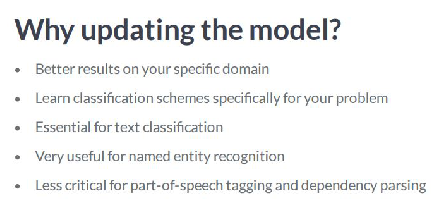

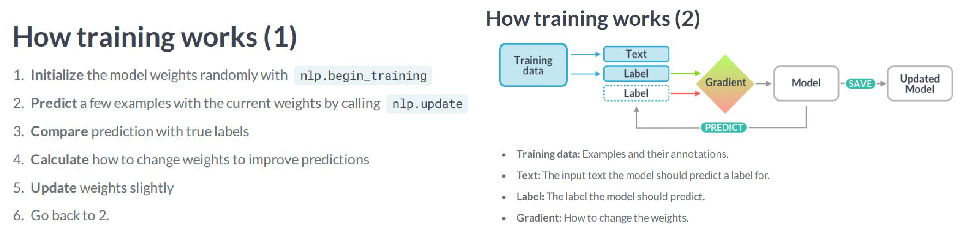

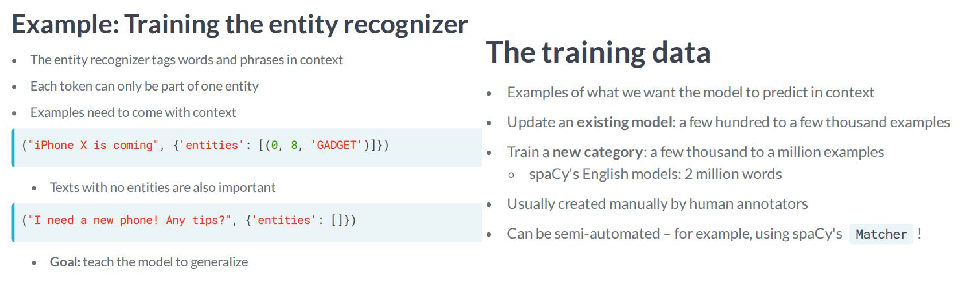

In [57]:
#vídeo

plot_1('updating')
plot_2('training_1', 'training_2')
plot_2('training_entity_recognizer', 'training_data')

Exercício 2

In [58]:
# Purpose of training

# While spaCy comes with a range of pre-trained models to predict linguistic annotations, you almost always want to 
# fine-tune them with more examples. You can do this by training them with more labelled data.

# What does training not help with?
print("Discover patterns in unlabelled data.")

Discover patterns in unlabelled data.


Exercício 3

In [59]:
# Creating training data (1)

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
TEXTS = ['How to preorder the iPhone X', 'iPhone X is coming', 'Should I pay $1,000 for the iPhone X?',
          'The iPhone 8 reviews are here', 'Your iPhone goes up to 11 today', 'I need a new phone! Any tips?']

##################

# Two tokens whose lowercase forms match 'iphone' and 'x'
pattern1 = [{'LOWER': 'iphone'}, {'LOWER': 'x'}]

# Token whose lowercase form matches 'iphone' and an optional digit
pattern2 = [{'LOWER': 'iphone'}, {'IS_DIGIT': True, 'OP': '?'}]

# Add patterns to the matcher
matcher.add('GADGET', None, pattern1, pattern2)


Exercício 4

In [60]:
# Creating training data (2)

# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Find the matches in the doc
    matches = matcher(doc)
    
    # Get a list of (start, end, label) tuples of matches in the text
    entities = [(start, end, 'GADGET') for match_id, start, end in matches]
    print(doc.text, entities)    
    
print(" ")

TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Match on the doc and create a list of matched spans
    spans = [doc[start:end] for match_id, start, end in matcher(doc)]
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, 'GADGET') for span in spans]
    
    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {'entities': entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)
    
print(*TRAINING_DATA, sep='\n')    

#  Before you train a model with the data, you always want to double-check that your matcher didn't identify any false
# positives. But that process is still much faster than doing everything manually.

How to preorder the iPhone X [(4, 6, 'GADGET'), (4, 5, 'GADGET')]
iPhone X is coming [(0, 2, 'GADGET'), (0, 1, 'GADGET')]
Should I pay $1,000 for the iPhone X? [(7, 9, 'GADGET'), (7, 8, 'GADGET')]
The iPhone 8 reviews are here [(1, 3, 'GADGET')]
Your iPhone goes up to 11 today [(1, 2, 'GADGET')]
I need a new phone! Any tips? []
 
('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]})
('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]})
('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]})
('The iPhone 8 reviews are here', {'entities': [(4, 12, 'GADGET')]})
('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]})
('I need a new phone! Any tips?', {'entities': []})


#### Exercício 5 - The training loop

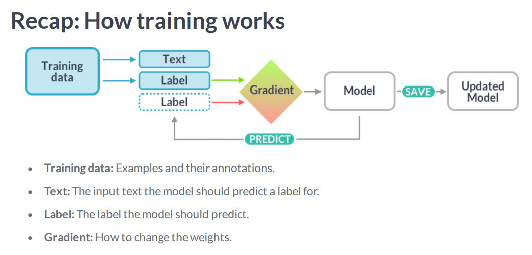

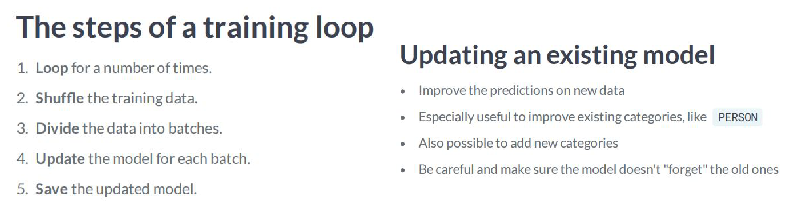

In [61]:
#vídeo
plot_1('recap_training', right=1.2)
plot_2('steps_training', 'updating_existing', right=1.8)

In [62]:
%%script false

# Example loop
# TRAINING_DATA = [...] 

import random

# Loop for 10 iterations
for i in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)
    # Create batches and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA):
        # Split the batch in texts and annotations
        texts = [text for text, annotation in batch]
        annotations = [annotation for text, annotation in batch]
        # Update the model
        nlp.update(texts, annotations)
        
# Save the model
nlp.to_disk(path_to_model)

##########################################################################

# Setting up a new pipeline from scratch
# Start with blank English model
nlp = spacy.blank('en')

# Create blank entity recognizer and add it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# Add a new label
ner.add_label('GADGET')

# Start the training
nlp.begin_training()

# Train for 10 iterations
for itn in range(10):
    random.shuffle(examples)
    # Divide examples into batches
    for batch in spacy.util.minibatch(examples, size=2):
        texts = [text for text, annotation in batch]
        annotations = [annotation for text, annotation in batch]
        # Update the model
        nlp.update(texts, annotations)



Couldn't find program: 'false'


Exercício 6

In [63]:
# Setting up the pipeline

# Create a blank 'en' model
nlp = spacy.blank('en')

# Create a new entity recognizer and add it to the pipeline
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# Add the label 'GADGET' to the entity recognizer
ner.add_label('GADGET')

# The pipeline is now ready, so let's start writing the training loop.

Exercício 7

In [64]:
TRAINING_DATA

[('How to preorder the iPhone X',
  {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]}),
 ('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]}),
 ('Should I pay $1,000 for the iPhone X?',
  {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]}),
 ('The iPhone 8 reviews are here', {'entities': [(4, 12, 'GADGET')]}),
 ('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]}),
 ('I need a new phone! Any tips?', {'entities': []})]

In [65]:
# Building a training loop

# Start the training
nlp.begin_training()

# Loop for 10 iterations
for itn in range(10):
    # Shuffle the training data
    random.shuffle(TRAINING_DATA)
    losses = {}
    
    # Batch the examples and iterate over them
    for batch in spacy.util.minibatch(TRAINING_DATA, size=2):
        texts = [text for text, entities in batch]
        annotations = [entities for text, entities in batch]
        
        # Update the model
        nlp.update(texts, annotations, losses=losses)
        print(losses)
        
        
# you've successfully trained your first spaCy model. The numbers printed to the IPython shell represent the loss on each 
# iteration, the amount of work left for the optimizer. The lower the number, the better. In real life, you normally want
# to use a lot more data than this, ideally at least a few hundred or a few thousand examples.

{'ner': 11.999999642372131}
{'ner': 20.339896380901337}
{'ner': 31.194218695163727}
{'ner': 10.270646691322327}
{'ner': 15.104049265384674}
{'ner': 18.764665067195892}
{'ner': 2.562278598546982}
{'ner': 4.975813422584906}
{'ner': 6.013845297740772}
{'ner': 1.5898122214566683}
{'ner': 2.113014465474407}
{'ner': 2.9839620608545374}
{'ner': 0.7420970685034263}
{'ner': 1.142705787410705}
{'ner': 1.5069328752238107}
{'ner': 0.07805041623743136}
{'ner': 0.8146236541227623}
{'ner': 0.8253581757545159}
{'ner': 0.00236764691080138}
{'ner': 0.0024161249964261295}
{'ner': 7.483297217183274}
{'ner': 2.19536298068021e-05}
{'ner': 3.1324001879905194e-05}
{'ner': 2.1679074350228142}
{'ner': 1.307287220812109e-06}
{'ner': 2.6008264804592424e-05}
{'ner': 1.9747525814169156}
{'ner': 7.1580361362122424e-06}
{'ner': 3.056088199476087e-05}
{'ner': 1.2144512066125648}


Exercício 8

In [66]:
# Exploring the model

# Let's see how the model performs on unseen data! To speed things up a little, here's a trained model for the label 
# 'GADGET', using the examples from the previous exercise, plus a few hundred more. The loaded model is already available
# as the nlp object. A list of test texts is available as TEST_DATA.

TEST_DATA = ['Apple is slowing down the iPhone 8 and iPhone X - how to stop it',
 "I finally understand what the iPhone X 'notch' is for",
 'Everything you need to know about the Samsung Galaxy S9',
 'Looking to compare iPad models? Here’s how the 2018 lineup stacks up',
 'The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple',
 'what is the cheapest ipad, especially ipad pro???',
 'Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics']

# Process each text in TEST_DATA
for doc in nlp.pipe(TEST_DATA):
    # Print the document text and entitites
    print(doc.text)
    print(doc.ents, '\n\n')

print("""Out of all the entities in the texts, how many did the model get correct?
Answer: {}""".format((2+1+0+0+2+0+0)/(2+1+1+1+2+1+1)))


Apple is slowing down the iPhone 8 and iPhone X - how to stop it
(iPhone, 8, iPhone) 


I finally understand what the iPhone X 'notch' is for
(iPhone,) 


Everything you need to know about the Samsung Galaxy S9
() 


Looking to compare iPad models? Here’s how the 2018 lineup stacks up
() 


The iPhone 8 and iPhone 8 Plus are smartphones designed, developed, and marketed by Apple
(iPhone 8, and iPhone 8, Plus are) 


what is the cheapest ipad, especially ipad pro???
() 


Samsung Galaxy is a series of mobile computing devices designed, manufactured and marketed by Samsung Electronics
() 


Out of all the entities in the texts, how many did the model get correct?
Answer: 0.5555555555555556


#### Exercício 9 - Training best practices

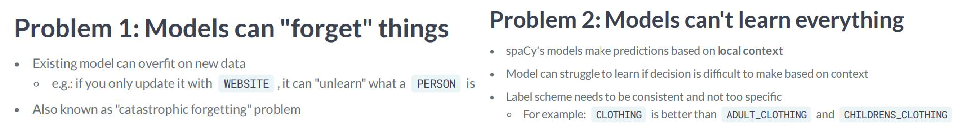

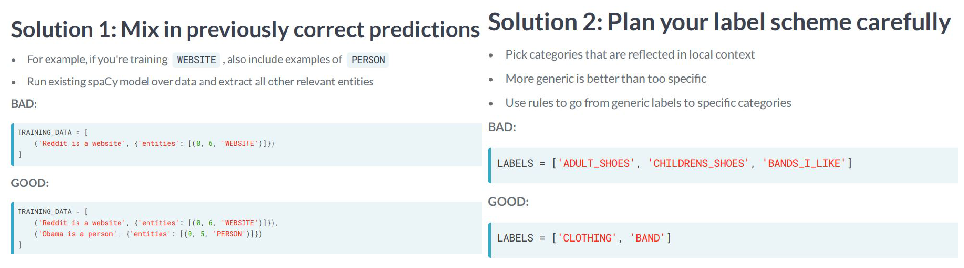

In [67]:
#vídeo

plot_2('problem_1', 'problem_2')
plot_2('solution_1', 'solution_2')

Exercício 10

In [68]:
# Good data vs. bad data

TOURIST_DESTINATION=[('i went to amsterdem last year and the canals were beautiful',
                      {'entities': [(10, 19, 'TOURIST_DESTINATION')]}),
                     ('You should visit Paris once in your life, but the Eiffel Tower is kinda boring', 
                      {'entities': [(17, 22, 'TOURIST_DESTINATION')]}),
                     ("There's also a Paris in Arkansas, lol", {'entities': []}),
                     ('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!', 
                      {'entities': [(0, 6, 'TOURIST_DESTINATION')]})]

# Why is this data and label scheme problematic?
print("""Whether a place is a tourist destination is a subjective judgement and not a definitive category. It will be very
difficult for the entity recognizer to learn.\n""")

#############################

# Rewrite the TRAINING_DATA to only use the label GPE (cities, states, countries) instead of TOURIST_DESTINATION.
# (Don't forget to add tuples for the GPE entities that weren't labeled in the old data.)

TRAINING_DATA = [
    ("i went to amsterdem last year and the canals were beautiful", {'entities': [(10, 19, 'GPE')]}),
    ("You should visit Paris once in your life, but the Eiffel Tower is kinda boring", {'entities': [(17, 22, 'GPE')]}),
    ("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]}),
    ("Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!", {'entities': [(0, 6, 'GPE')]})
]

print(*TRAINING_DATA, sep='\n')

# Once the model achieves good results on detecting GPE entities in the traveler reviews, you could add a rule-based 
# component to determine whether the entity is a tourist destination in this context. For example, you could resolve the 
# entities types back to a knowledge base or look them up in a travel wiki.

Whether a place is a tourist destination is a subjective judgement and not a definitive category. It will be very
difficult for the entity recognizer to learn.

('i went to amsterdem last year and the canals were beautiful', {'entities': [(10, 19, 'GPE')]})
('You should visit Paris once in your life, but the Eiffel Tower is kinda boring', {'entities': [(17, 22, 'GPE')]})
("There's also a Paris in Arkansas, lol", {'entities': [(15, 20, 'GPE'), (24, 32, 'GPE')]})
('Berlin is perfect for summer holiday: lots of parks, great nightlife, cheap beer!', {'entities': [(0, 6, 'GPE')]})


Exercício 11

In [69]:
# Training multiple labels

# Here's a small sample of a dataset created to train a new entity type WEBSITE. The original dataset contains a few 
# thousand sentences. In this exercise, you'll be doing the labeling by hand. In real life, you probably want to automate 
# this and use an annotation tool – for example, Brat, a popular open-source solution, or Prodigy, our own annotation tool 
# that integrates with spaCy.

TRAINING_DATA = [
    ("Reddit partners with Patreon to help creators build communities", 
     {'entities': [(0, 6, 'WEBSITE'), (20, 28, 'WEBSITE')]}),
  
    ("PewDiePie smashes YouTube record", 
     {'entities': [(19, 26, 'WEBSITE')]}),
  
    ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans", 
     {'entities': [(0, 6, 'WEBSITE')]}),
    # And so on...
]

# A model was trained with the data you just labelled, plus a few thousand similar examples. After training, it's doing 
# great on WEBSITE, but doesn't recognize PERSON anymore. Why could this be happening?
print("""The training data included no examples of PERSON, so the model learned that this label is incorrect.\n""")


# Update the training data to include annotations for the PERSON entities "PewDiePie" and "Alexis Ohanian".
TRAINING_DATA = [
    ("Reddit partners with Patreon to help creators build communities", 
     {'entities': [(0, 6, 'WEBSITE'), (21, 28, 'WEBSITE')]}),
  
    ("PewDiePie smashes YouTube record", 
     {'entities': [(0, 9, 'PERSON'), (18, 25, 'WEBSITE')]}),
  
    ("Reddit founder Alexis Ohanian gave away two Metallica tickets to fans", 
     {'entities': [(0, 6, 'WEBSITE'), (15, 29, 'PERSON')]}),
    # And so on...
]


The training data included no examples of PERSON, so the model learned that this label is incorrect.



#### Exercício 12 - end

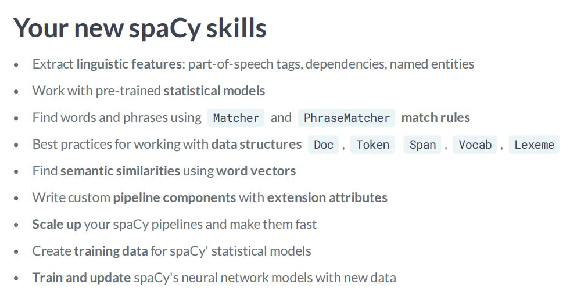

In [71]:
#vídeo
plot_1('spacy_skills', right=1.4)

**More things to do with spaCy:**

- Training and updating (https://spacy.io/usage/training) other pipeline components
  - Part-of-speech tagger
  - Dependency parser
  - Text classifier
  
  
- Customizing the tokenizer (https://spacy.io/usage/linguistic-features#tokenization)
  - Adding rules and exceptions to split text differently


- Adding or improving support for other languages (https://spacy.io/usage/adding-languages)
  - 45+ languages currently
  - Lots of room for improvement and more languages
  - Allows training models for other languages
  

# Fim